In [127]:
import pandas as pd
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_columns = None


# Analysis

In [153]:
df = pd.read_csv('played_out_cleaned.csv')

In [135]:
sample = df[df['user'] == 'b3a05964788f4433a57a6113f54418e2_AnirudhParameswaran'].sort_values(by='position', ascending=True).reset_index(drop=True)
sample.head() # (51, 23)

,position,played_at,duration_ms,explicit,track_id,track_name,popularity,first_genre,user,gender,age,accousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist
0,0,2025-10-1T01:00:00:000Z,223760,False,1lK5iIMKifrxERzS3iimJH,Breathe on Me,56,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.00209,0.709,0.565,0.01250,5.0,0.0901,-6.395,0.0,0.0471,112.203,0.571,Britney Spears
1,1,2025-10-1T02:00:00:000Z,167303,False,4Dvkj6JhhA12EX05fT7y2e,As It Was,88,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.34200,0.520,0.731,0.00101,6.0,0.3110,-5.338,0.0,0.0557,173.930,0.662,Harry Styles
2,2,2025-12-20T17:14:51.694Z,210373,False,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,95,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.20000,0.747,0.507,0.06080,2.0,0.1170,-10.171,1.0,0.0358,104.978,0.438,Billie Eilish
3,3,2025-12-20T17:14:57.534Z,173991,False,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,84,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.12200,0.548,0.816,0.00000,0.0,0.3350,-4.209,1.0,0.0465,95.390,0.557,Harry Styles
4,4,2025-12-20T17:15:00.448Z,200600,False,7DSAEUvxU8FajXtRloy8M0,Flowers,86,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.05840,0.706,0.691,0.00007,0.0,0.0232,-4.775,1.0,0.0633,118.048,0.632,Miley Cyrus


In [136]:
sample['position']
sample['track_name'].unique().size   # 51 songs and not 50 ????

51

In [137]:
positional_df = df.groupby('position')['popularity'].agg(['mean', 'std']).reset_index()
positional_df.columns = ['position', 'popularity_mean', 'popularity_std']

positional_df.head()

,position,popularity_mean,popularity_std
0,0,60.449438,9.091719
1,1,67.168539,30.825106
2,2,78.573034,11.247108
3,3,75.640449,16.531820
4,4,74.494382,20.276567


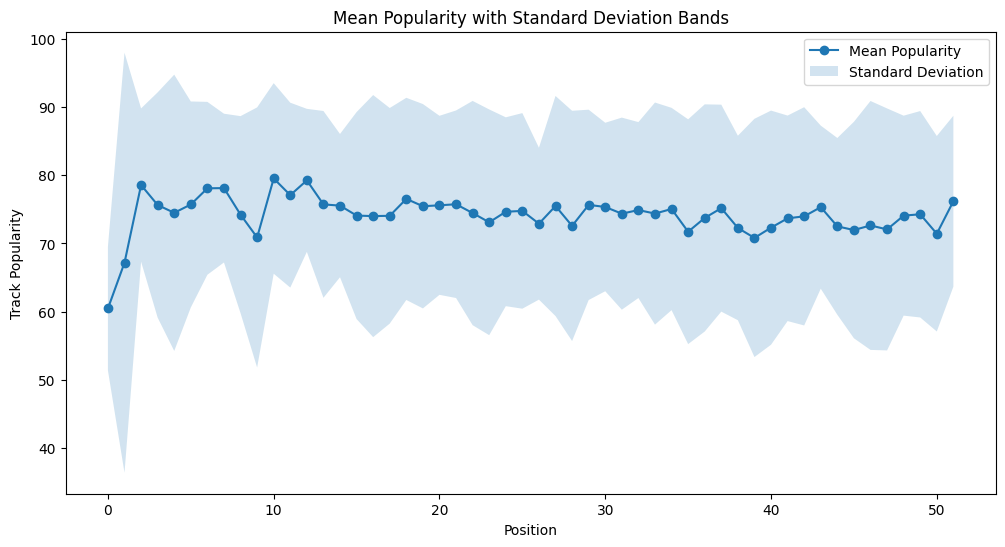

In [138]:
plt.figure(figsize=(12, 6))

# Plot the mean line and points
plt.plot(positional_df['position'], positional_df['popularity_mean'], marker='o', label='Mean Popularity')

# Plot the error bands (mean +/- std)
plt.fill_between(
    positional_df['position'], 
    positional_df['popularity_mean'] - positional_df['popularity_std'], 
    positional_df['popularity_mean'] + positional_df['popularity_std'], 
    alpha=0.2, 
    label='Standard Deviation'
)

plt.xlabel('Position')
plt.ylabel('Track Popularity')
plt.title('Mean Popularity with Standard Deviation Bands')
plt.legend()
plt.show()

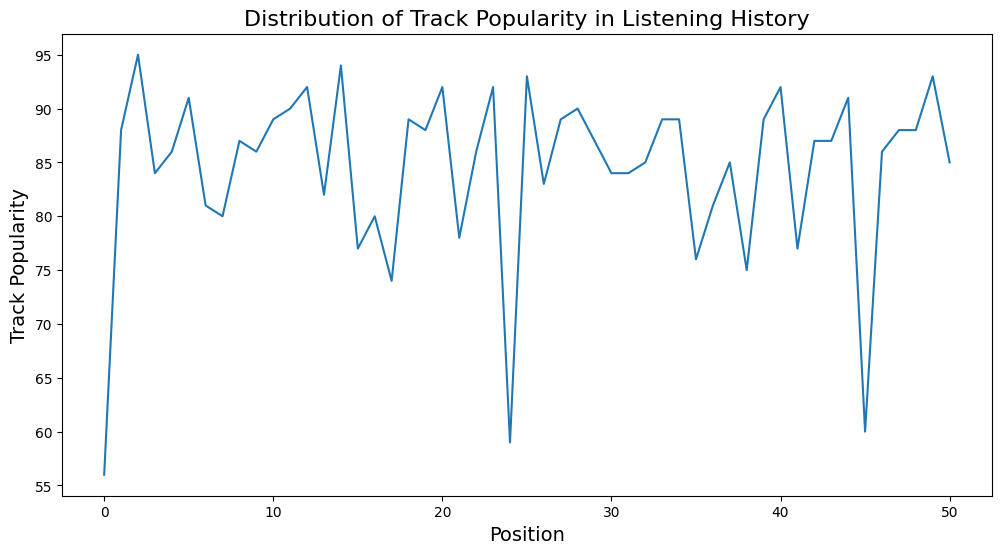

In [139]:
figure, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='position', y='popularity', data=sample, ax = ax)
ax.set_title('Distribution of Track Popularity in Listening History', fontsize=16)
ax.set_ylabel('Track Popularity', fontsize=14)
ax.set_xlabel('Position', fontsize=14)
plt.show()

In [152]:
df.isna().sum()

position              0
played_at             0
duration_ms           0
explicit              0
track_id              0
track_name            0
popularity            0
first_genre           0
user                  0
gender                0
age                   0
accousticness       273
danceability        273
energy              273
instrumentalness    273
key                 273
liveness            273
loudness            273
mode                273
speechiness         273
tempo               273
valence             273
artist                0
dtype: int64

In [143]:
df.shape

(4572, 23)

In [144]:
df[df['accousticness'].isna()]

,position,played_at,duration_ms,explicit,track_id,track_name,popularity,first_genre,user,gender,age,accousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist
2,0,2025-10-1T01:00:00:000Z,254466,False,6nz35DNIzbtj5ztpDEcW1j,"Kick, Push",64,2,6016a0c171f34d44bc5840e0f521a034_D,F,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lupe Fiasco
5,0,2025-10-1T01:00:00:000Z,254466,False,6nz35DNIzbtj5ztpDEcW1j,"Kick, Push",64,2,26af6215d5dc41ba90ab08372ec96e71_Mo2F,F,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lupe Fiasco
6,0,2025-10-1T01:00:00:000Z,315426,False,40gRh2ZURv5tYBo8yB9Lu3,"Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...",70,5,f47677960ad044819291b0a57cae6c84_Ömercan3,M,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ludwig van Beethoven, Paul Lewis"
7,0,2025-10-1T01:00:00:000Z,315426,False,40gRh2ZURv5tYBo8yB9Lu3,"Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...",70,5,df734b2f512a4a46ab6ed07e3b948f45_Yanyi2005,M,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ludwig van Beethoven, Paul Lewis"
10,0,2025-10-1T01:00:00:000Z,254466,False,6nz35DNIzbtj5ztpDEcW1j,"Kick, Push",64,2,65cbd7ca2e8f4589bb9edc3d8319f73d_Jay,M,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lupe Fiasco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,51,2026-01-13T18:45:27.139Z,258986,False,3FSPaBp49Clqq2p4zc9dbA,Photograph,61,1,d7e1a2b9c8f3a5d0e6b1f2c4a9d8e,M,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ed Sheeran
4560,51,2025-12-27T16:07:53.252Z,234306,True,50M2QjfSM82wkJ1d0iV4mh,Daydreamin' (feat. Jill Scott),64,2,65cbd7ca2e8f4589bb9edc3d8319f73d_Jay,M,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lupe Fiasco, Jill Scott"
4561,51,2026-01-02T18:00:59.760Z,203807,False,5uu0D02efCoFMQiLYFT32e,Levitating,56,1,ec9cabb17f844d2d8817b51d10e2bce9_CaseStudy01,F,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dua Lipa
4564,51,2025-12-06T20:55:58.083Z,242373,False,3Fcfwhm8oRrBvBZ8KGhtea,Viva La Vida,74,3,f01e1d6dbc6f46ef87bc7054ba34481a_Jaya Lara,F,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coldplay
